In [44]:
import sys
import os

sys.path.append("needed_modules/")


import relaxations as rt
import timescales as ts
import manage_files as mf
#import plotting as pt
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

#Load experimental data
experiments = np.loadtxt("Relaxation_exp.txt",comments=["#"])

#Set needed constants and Magnetic Field
gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;

magnetic_field = 850*(2*np.pi/gammaH*10**6)

In [41]:
timescales_yamls["aa_70_1_all"]["analysis0"]["results"]["timescales"]

[[1.0000000000000002e-12,
  1.0797751623277095e-12,
  1.1659144011798311e-12,
  1.2589254117941663e-12,
  1.3593563908785244e-12,
  1.4677992676220678e-12,
  1.5848931924611112e-12,
  1.7113283041617777e-12,
  1.8478497974222943e-12,
  1.9952623149688827e-12,
  2.154434690031887e-12,
  2.3263050671536284e-12,
  2.5118864315095827e-12,
  2.7122725793320297e-12,
  2.928644564625237e-12,
  3.1622776601683794e-12,
  3.4145488738336006e-12,
  3.686945064519574e-12,
  3.98107170553497e-12,
  4.298662347082273e-12,
  4.6415888336127725e-12,
  5.0118723362727155e-12,
  5.411695265464626e-12,
  5.843414133735163e-12,
  6.309573444801943e-12,
  6.812920690579623e-12,
  7.35642254459642e-12,
  7.943282347242821e-12,
  8.576958985908948e-12,
  9.261187281287938e-12,
  1.0000000000000001e-11,
  1.0797751623277095e-11,
  1.1659144011798313e-11,
  1.2589254117941663e-11,
  1.3593563908785244e-11,
  1.4677992676220676e-11,
  1.584893192461111e-11,
  1.7113283041617846e-11,
  1.8478497974222874e-11,
  

In [42]:
timescales_yamls["aa_70_1_all"]["analysis0"]["info"]['06_analyze']

20.0

In [24]:
for file in os.listdir("./final_rotacfs/"):
    print('_'.join(file.split('_')[:-2]))
    try:
        os.system(f"mv ./final_rotacfs/{file} corr_func/{'_'.join(file.split('_')[:-2])}/{file}")
    except:
        pass

In [5]:
output_path_relax="relaxations/"            # folder to save spin relaxation times yaml files, 
                                      # defined above or redefine here 
output_path_timescales="timescales/"  # folder to save timescale yaml files
                                      # defined above or redefine here

relaxation_yamls,timescales_yamls=mf.load_yaml_files(output_path_relax,output_path_timescales)

Spin relaxation data exist for:


 
Timescales exist for:

   * aa_70_1_all
   * aa_70_charmm_2_all
   * aa_50_2_all
   * aa_70_amber_1_all
   * aa_70_pf_1_all
   * aa_70_pfp_3_all
   * aa_30_1_all
   * aa-new_90_1_all
   * aa_50_3_all
   * aa_70_charmm_1_all
   * aa_90_pfp_3_all
   * aa_70_pfp_2_all
   * aa_110_3_all
   * aa_70_opc_2_all
   * aa_70_pfp_1_all
   * aa_70_charmm_3_all
   * aa_90_pfp_1_all
   * aa-new_90_3_all
   * aa-new_90_t_all
   * aa_110_2_all
   * aa_70_pf_2_all
   * aa_70_3_all
   * aa_50_1_all
   * aa-new_90_2_all
   * aa_90_pfp_2_all
   * aa_110_1_all
   * aa_70_2_all
   * aa_70_pf_3_all
   * aa_70_opc_3_all


In [79]:
def plot_SRT_convergence_for_system(system):
    fig = plt.figure(figsize=(15,15))
    ax={}



    outer = gridspec.GridSpec(7,3,hspace=0.4)
    for i in range(21):
        inner = gridspec.GridSpecFromSubplotSpec(1,3,subplot_spec=outer[i],wspace=0.1)
        for j in range(3):
            ax[i,j] = plt.Subplot(fig, inner[j])
            fig.add_subplot(ax[i,j])
            ax[i,j].yaxis.set_tick_params(labelsize=5)
            ax[i,j].xaxis.set_tick_params(labelsize=8)

        """
        Plot rectangelas for experimental ranges, 
        independent od residues, 
        shows min to max values of T1, T2, hetNOE
        """

        T1rec = patches.Rectangle((0, min(experiments[:,1])), 220, (max(experiments[:,1])-min(experiments[:,1])), linewidth=1, edgecolor='r', facecolor='black',alpha=0.1)
        ax[i,0].add_patch(T1rec)
        #ax[i,0].plot(0, min(experiments[:,1]),'.')

        T2rec = patches.Rectangle((0, min(experiments[:,3]/1000)), 220, (max(experiments[:,3]/1000)-min(experiments[:,3]/1000)), linewidth=1, edgecolor='r', facecolor='black',alpha=0.1)
        ax[i,1].add_patch(T2rec)


        NOErec = patches.Rectangle((0, min(experiments[:,5])), 220, (max(experiments[:,5])-min(experiments[:,5])), linewidth=1, edgecolor='r', facecolor='black',alpha=0.1)
        ax[i,2].add_patch(NOErec)



    corr_parts=[]
    T1s = []
    T2s = []
    NOEs = []
    for analysis in timescales_yamls[system]:
        part = timescales_yamls[system][analysis]["info"]['06_analyze']
        Ctimes = timescales_yamls[system][analysis]["results"]["timescales"][0]
        for i in range(1,len(timescales_yamls[system][analysis]["results"]["timescales"])):
            Coeffs = timescales_yamls[system][analysis]["results"]["timescales"][i]
            T1, T2, NOE = rt.get_relaxation_N(magnetic_field,Coeffs,Ctimes,OP=0)
            colour = "blue"
            if Coeffs[-1]!=0:
                colour = "red"
                scale=1-Coeffs[-1]
                Coeffs[-1]=0
                Coeffs=np.array(Coeffs)/scale
                T1w, T2w, NOEw = rt.get_relaxation_N(magnetic_field,Coeffs,Ctimes,OP=0)
                ax[i-1,0].plot(part,T1w,".",c="g")
                ax[i-1,1].plot(part,T2w,".",c="g")
                ax[i-1,2].plot(part,NOEw,".",c="g")
            ax[i-1,0].plot(part,T1,".",c=colour)
            ax[i-1,1].plot(part,T2,".",c=colour)
            ax[i-1,2].plot(part,NOE,".",c=colour)

            ax[i-1,1].set_title(f"Residue {i+1}",size=8)
            
    plt.suptitle(system,x=0.5,y=0.92)
    plt.savefig(f"results/00_SRT_vs_corr_func_length/{system}.pdf",bbox_inches='tight')

/tmp/ipykernel_3856922/1147722227.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,15))


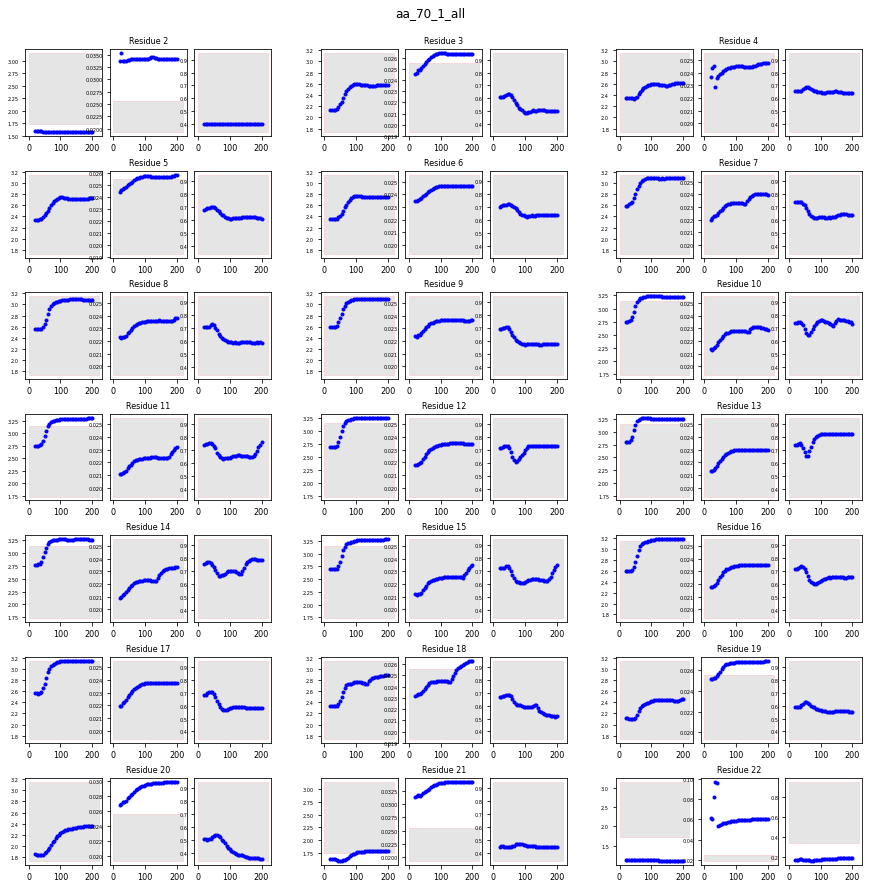

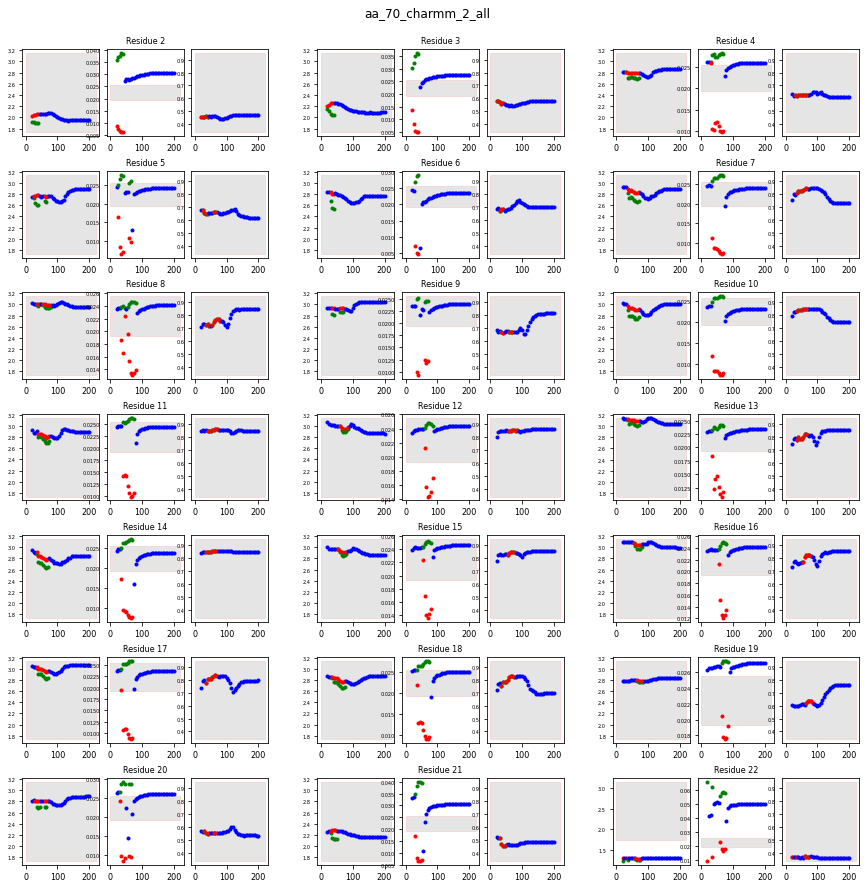

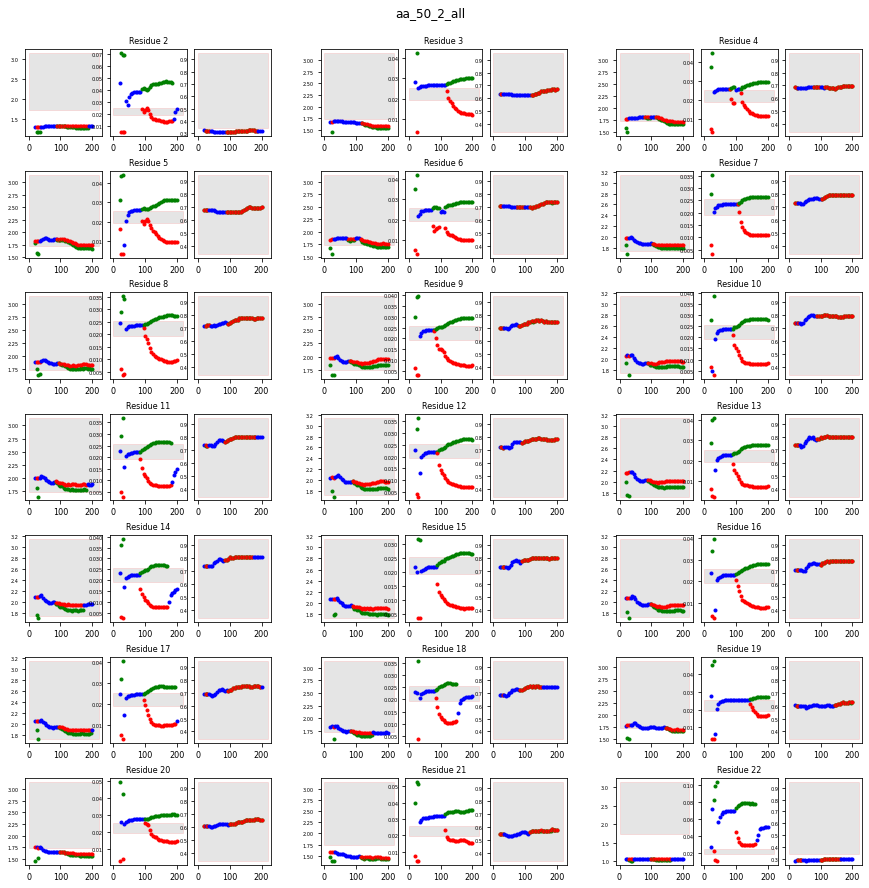

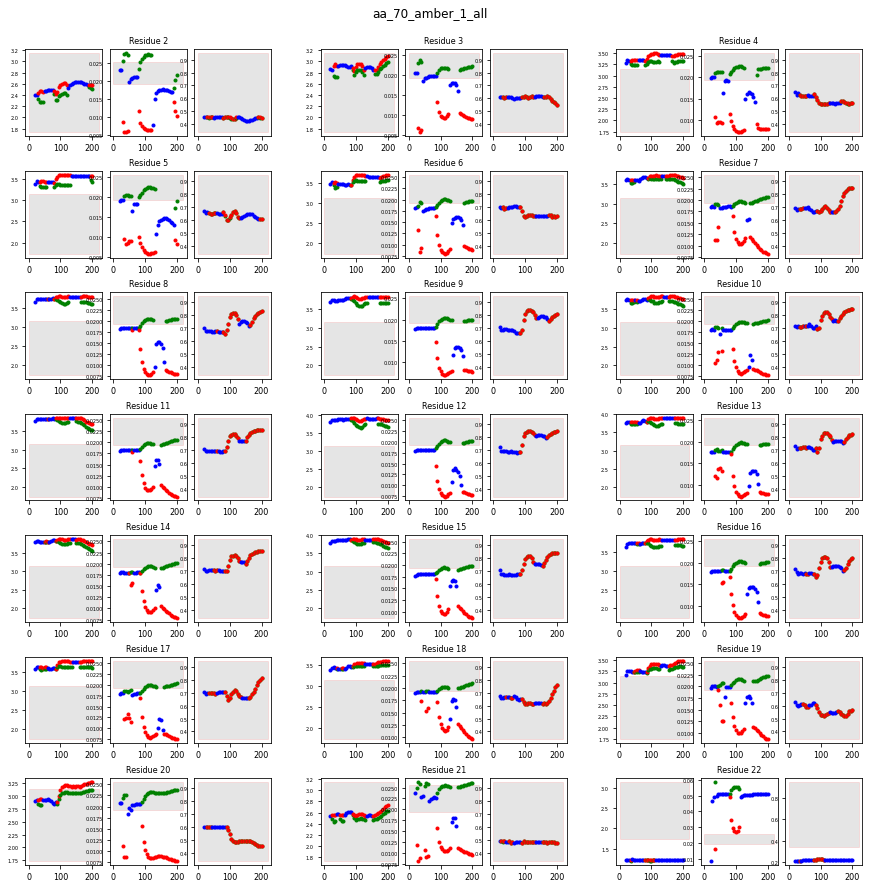

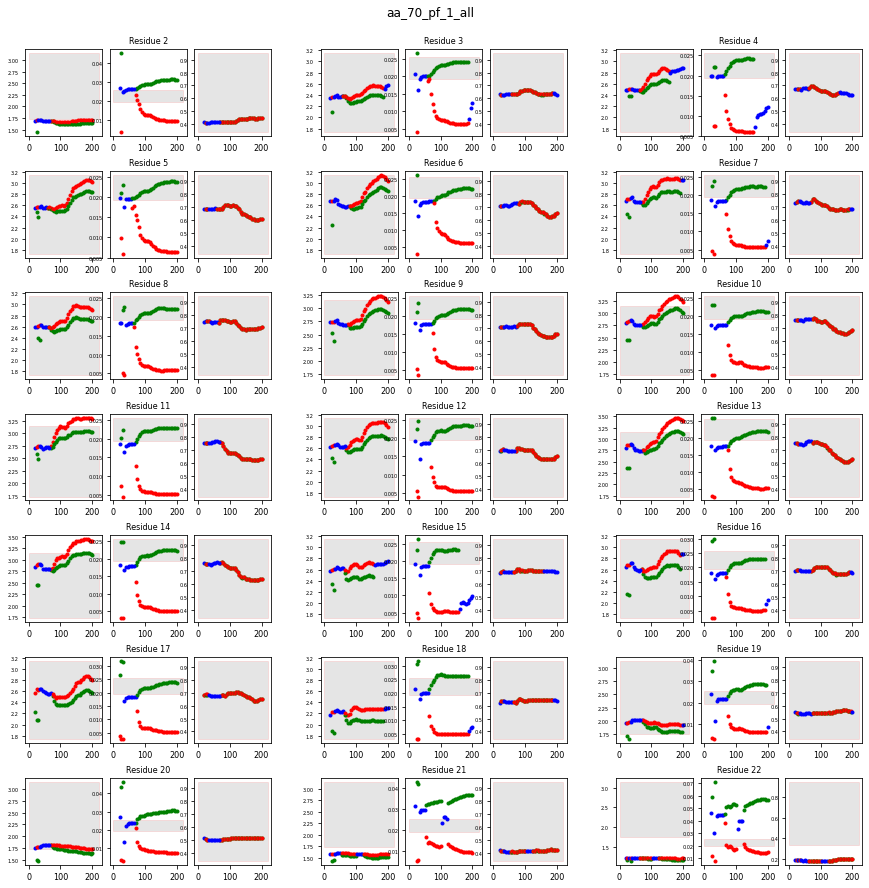

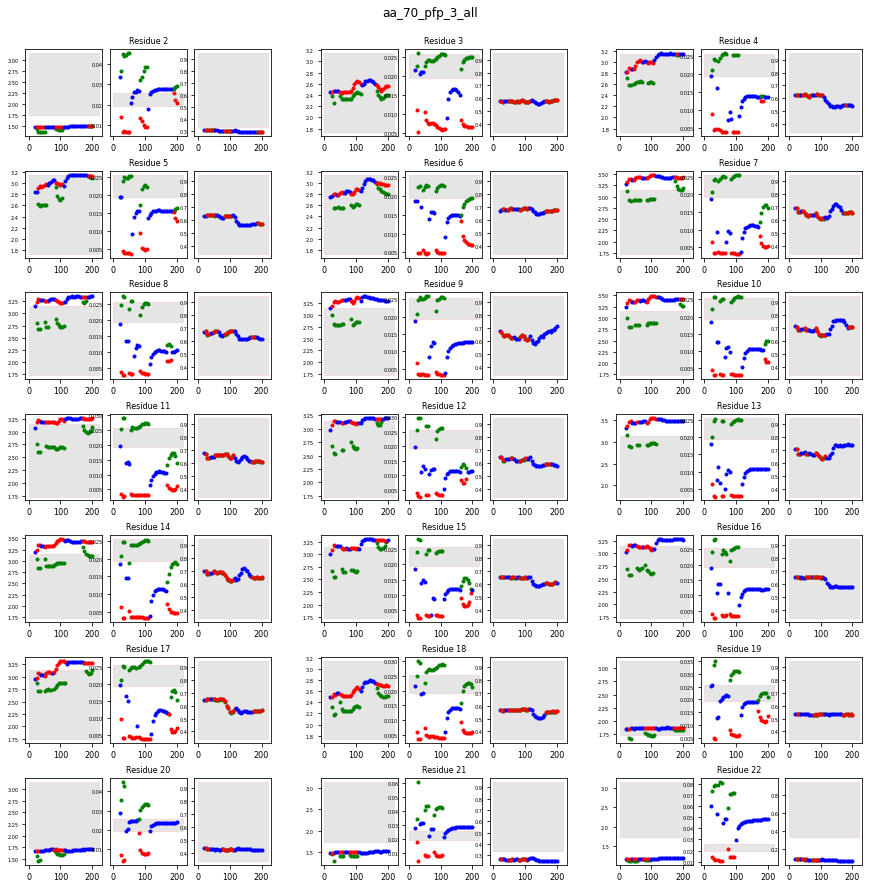

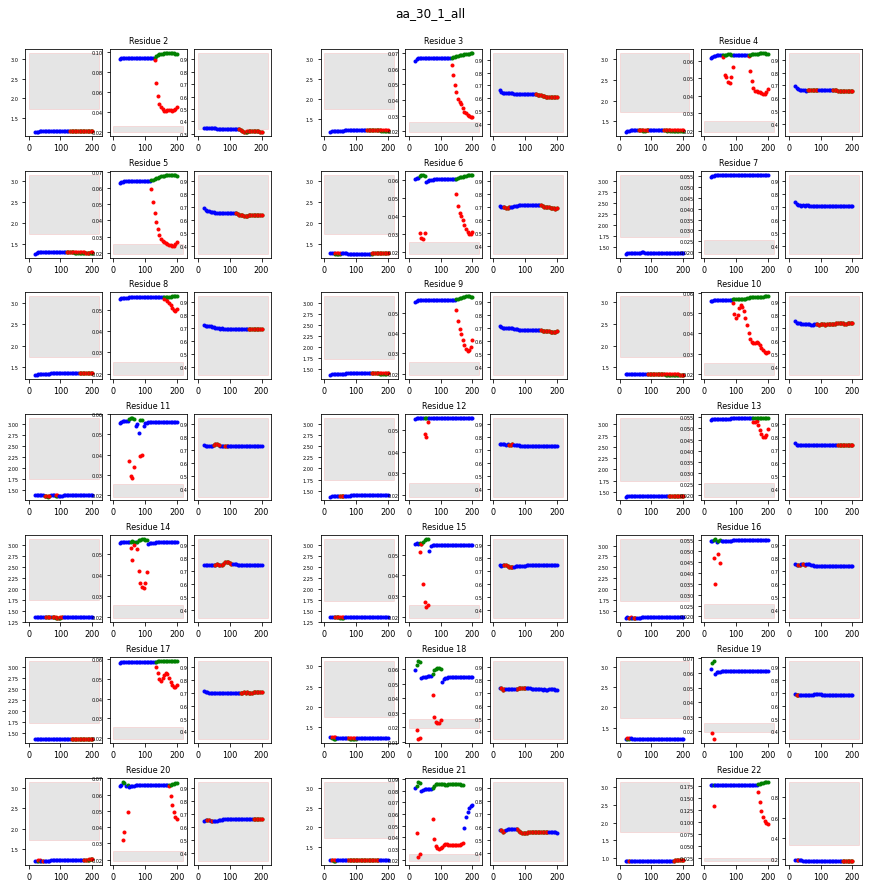

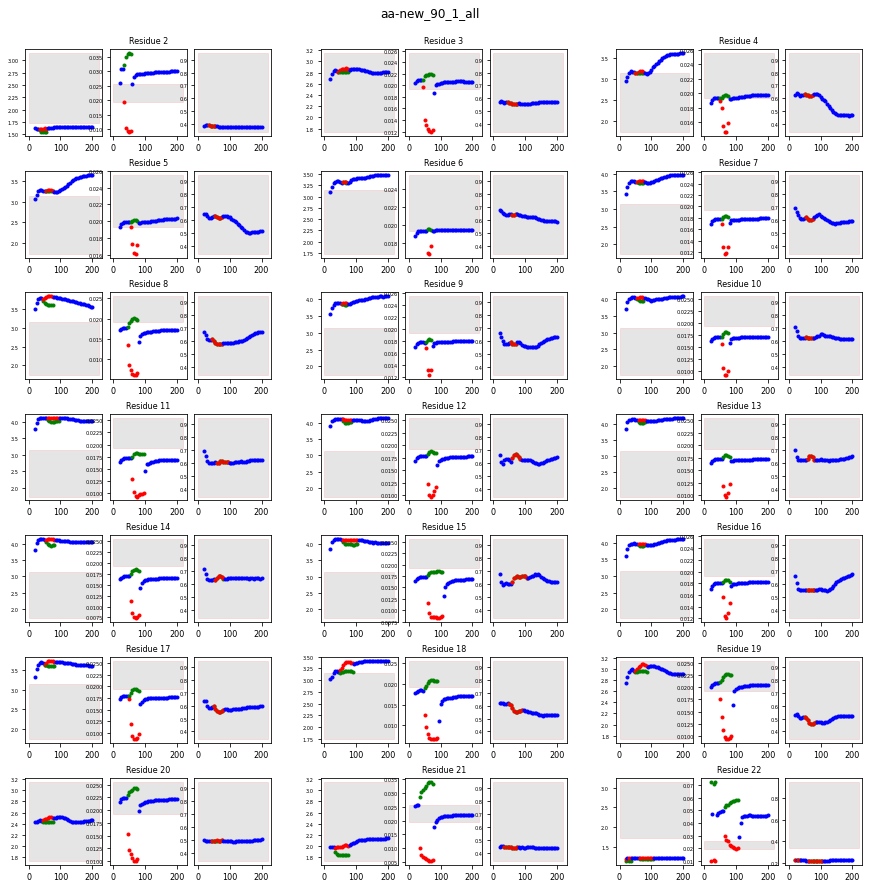

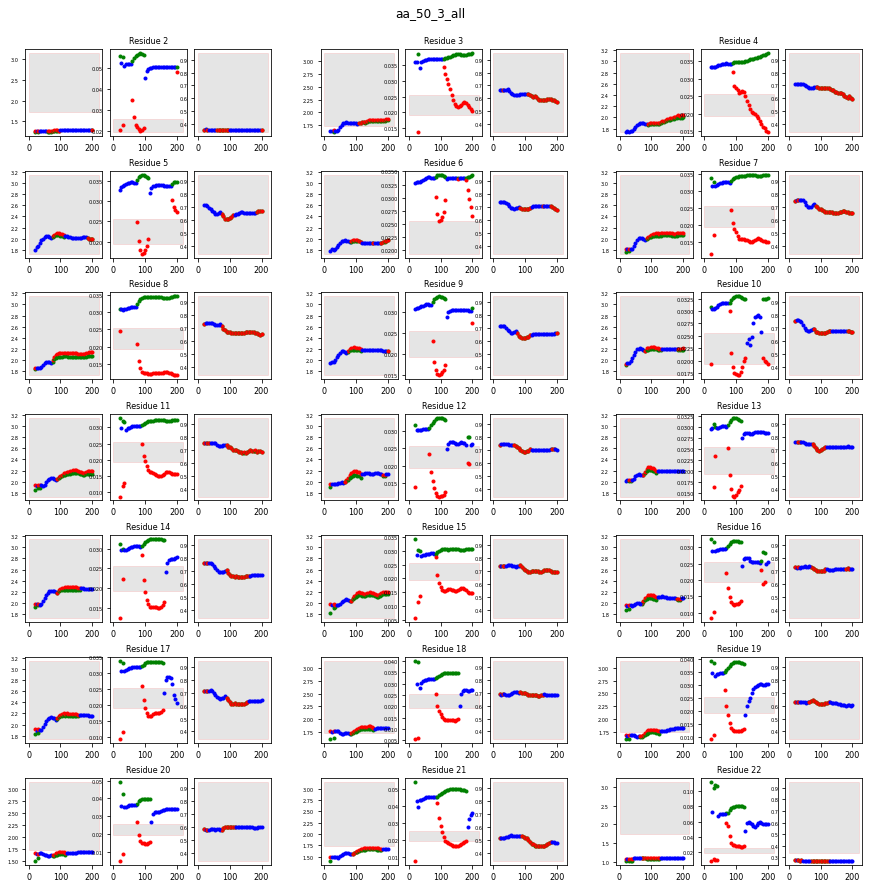

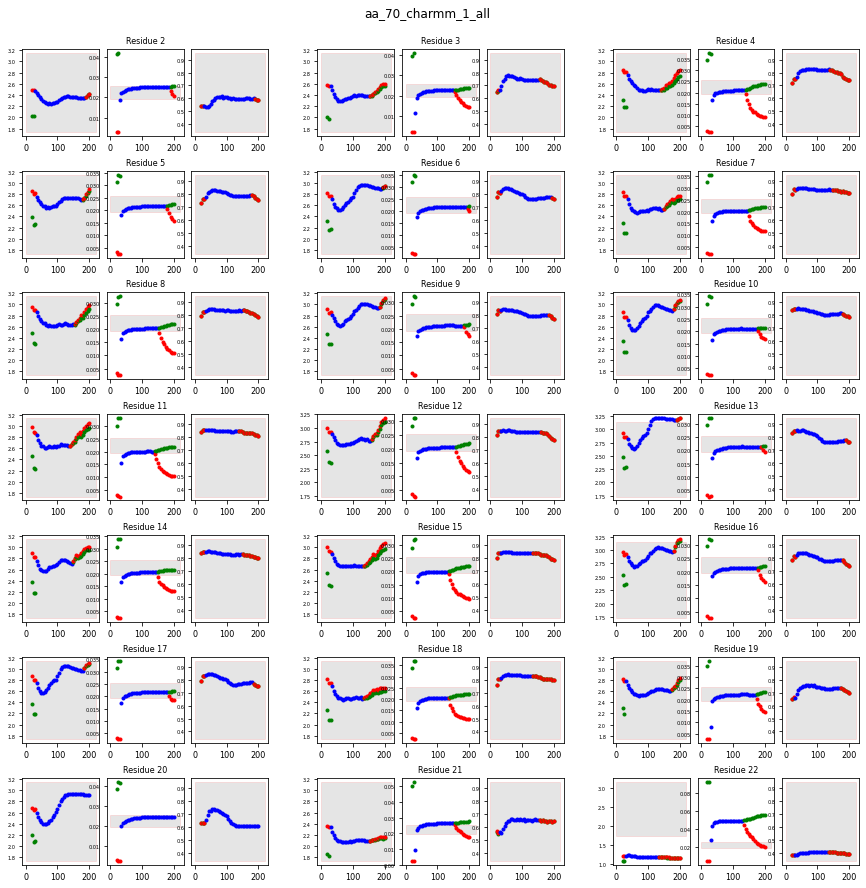

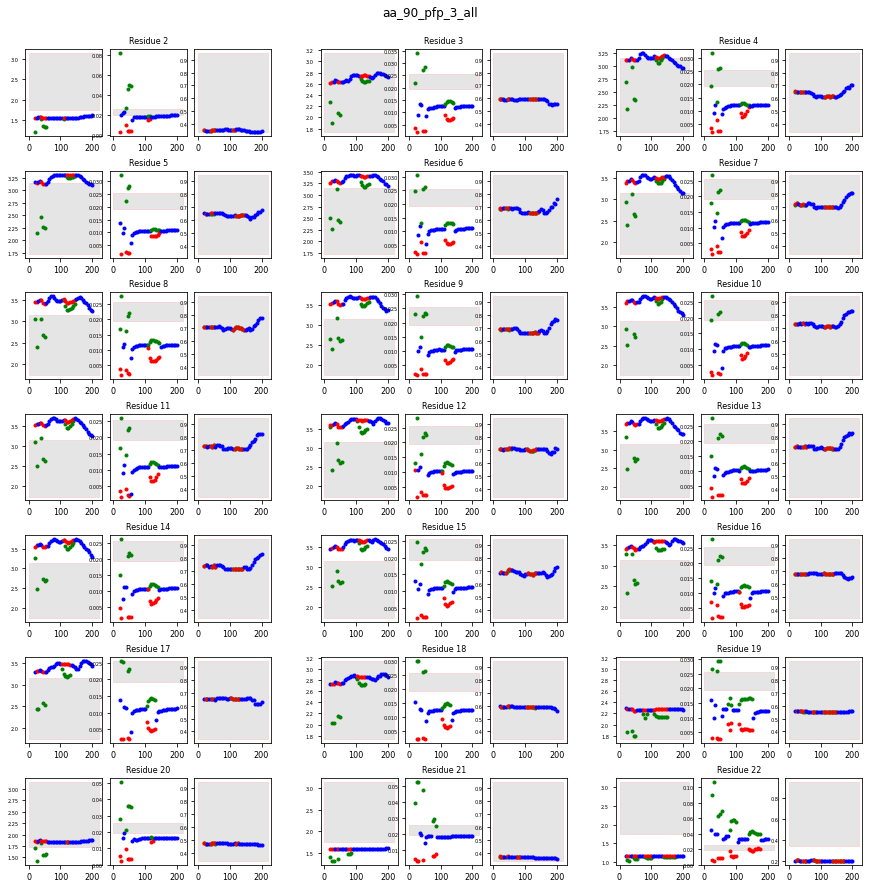

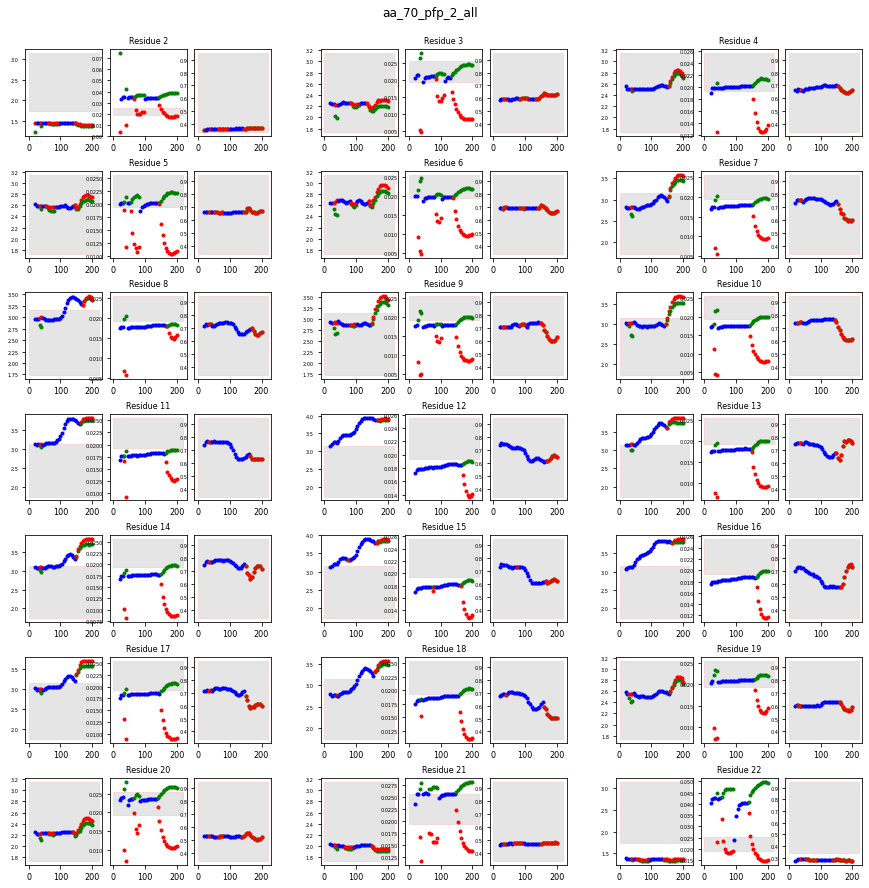

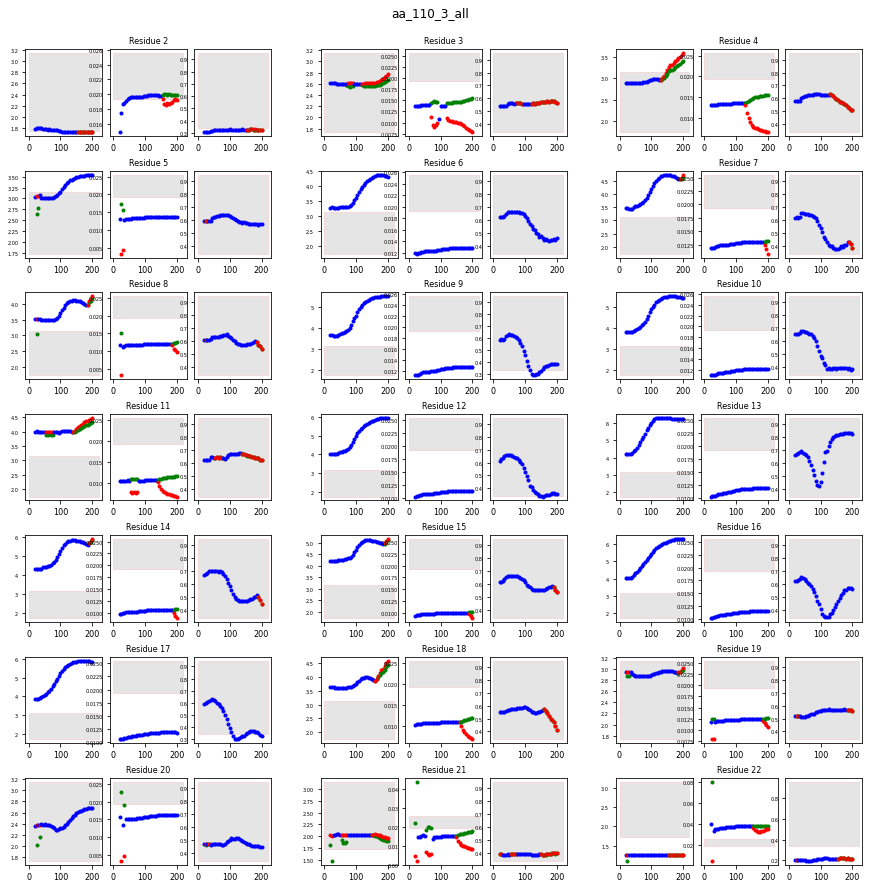

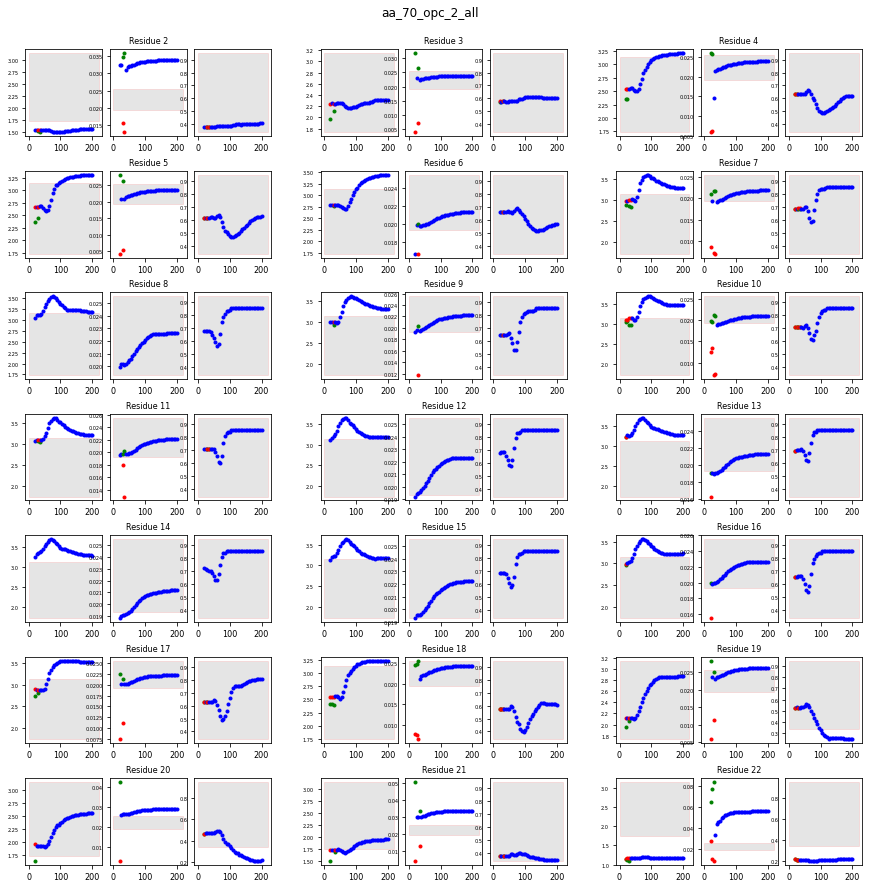

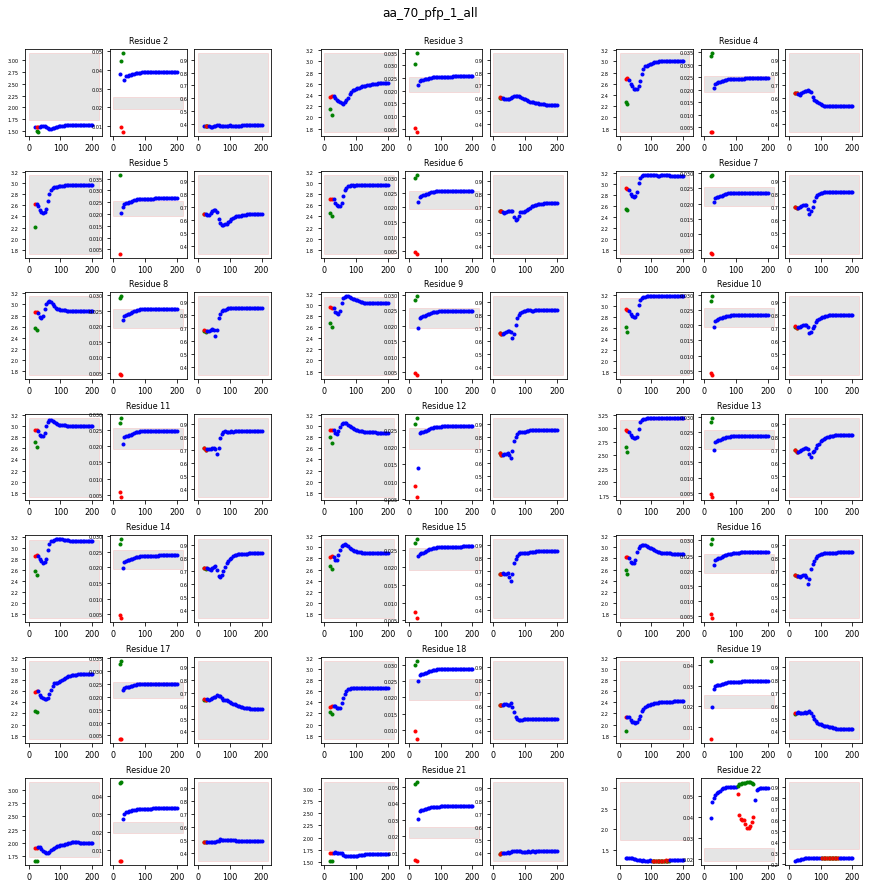

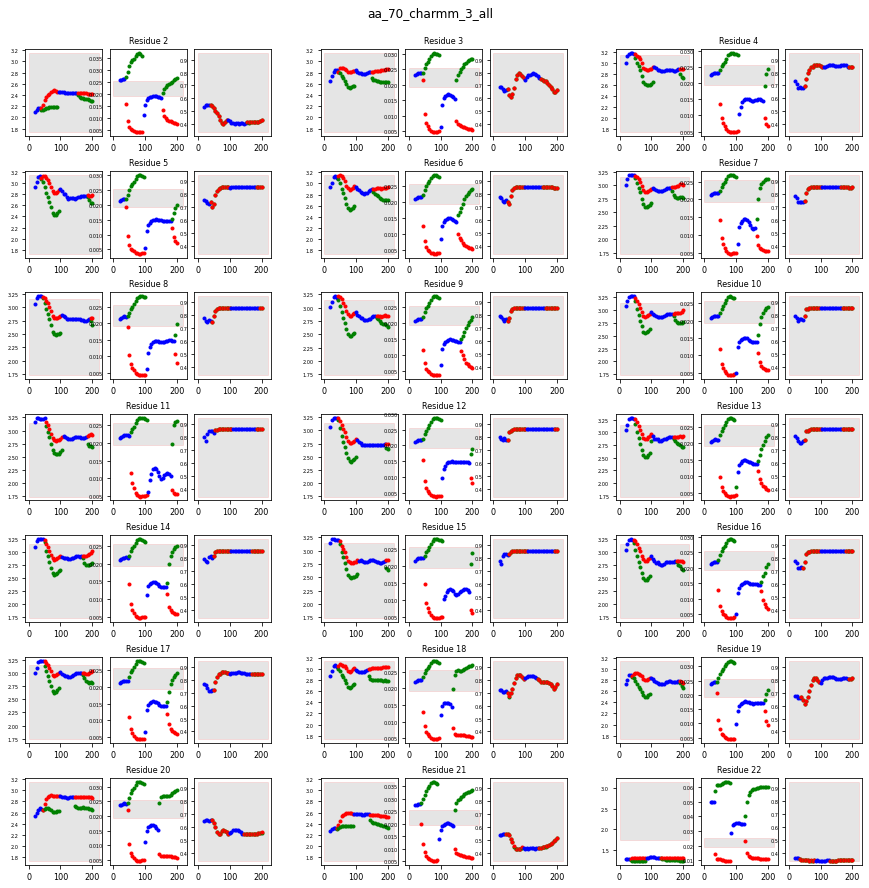

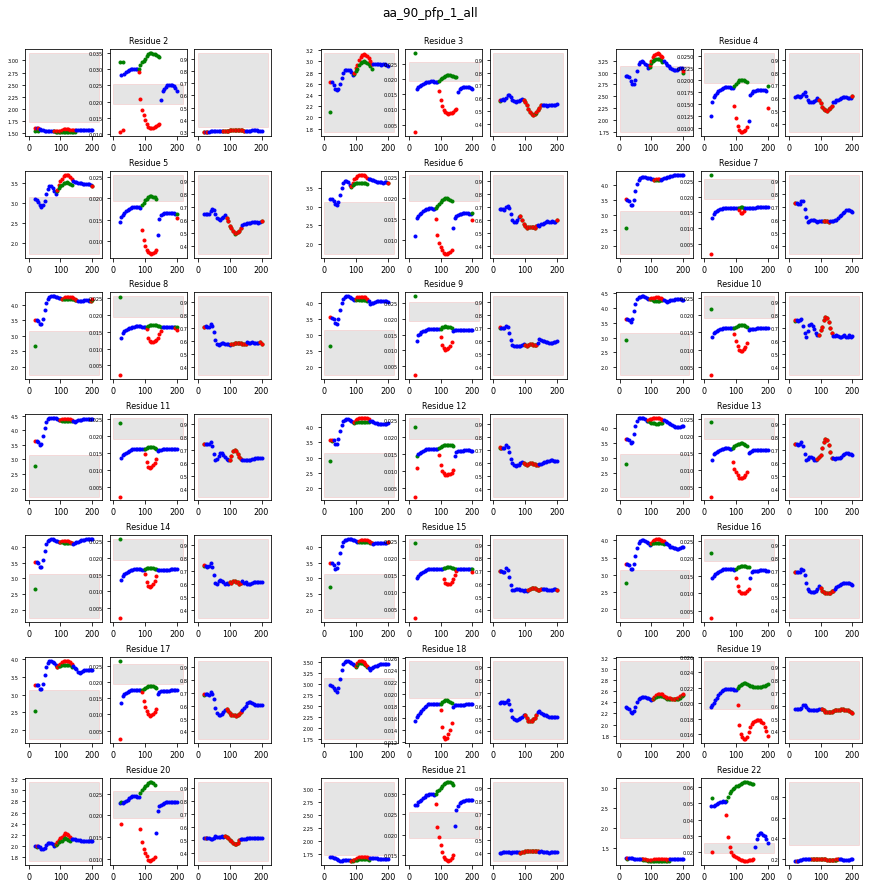

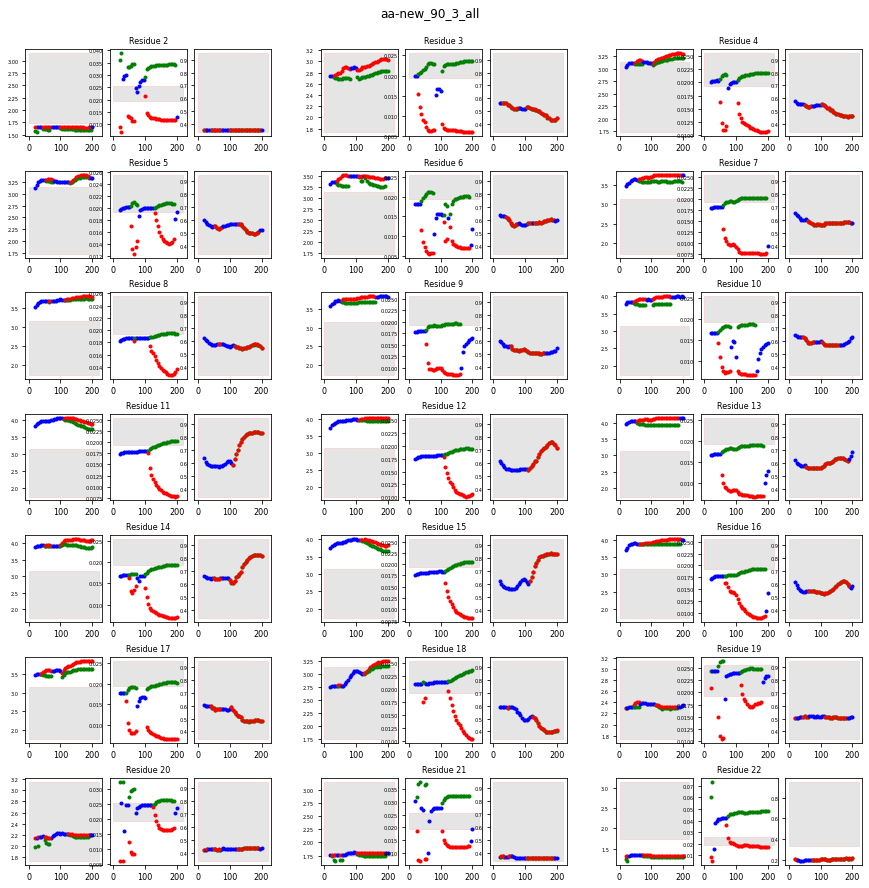

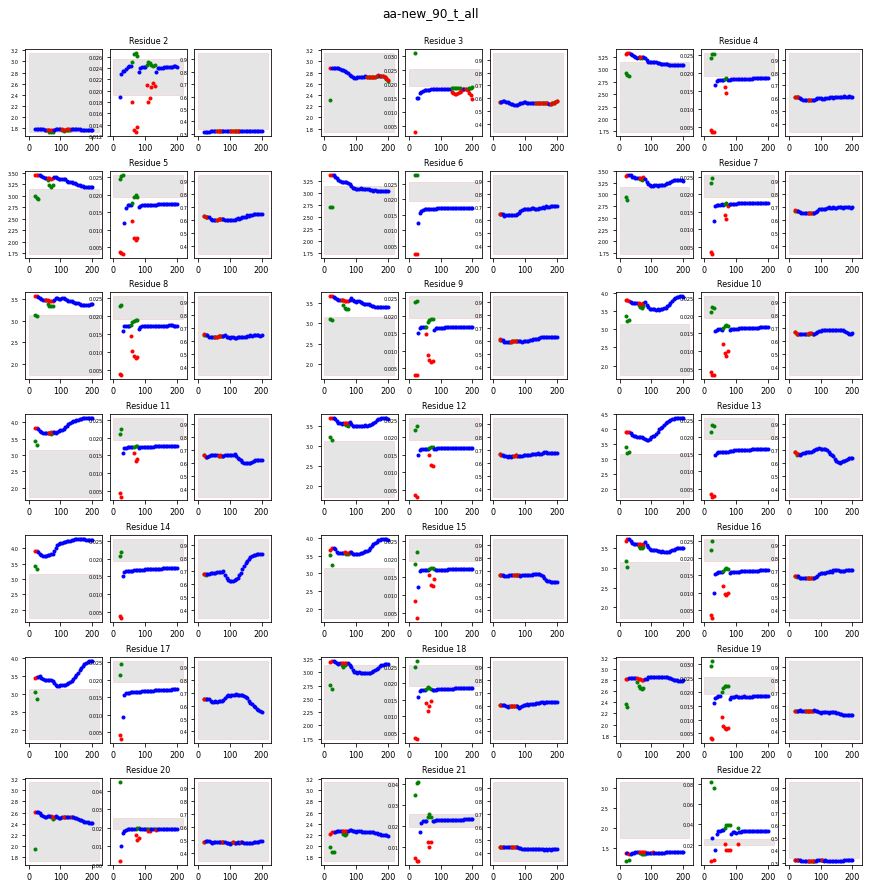

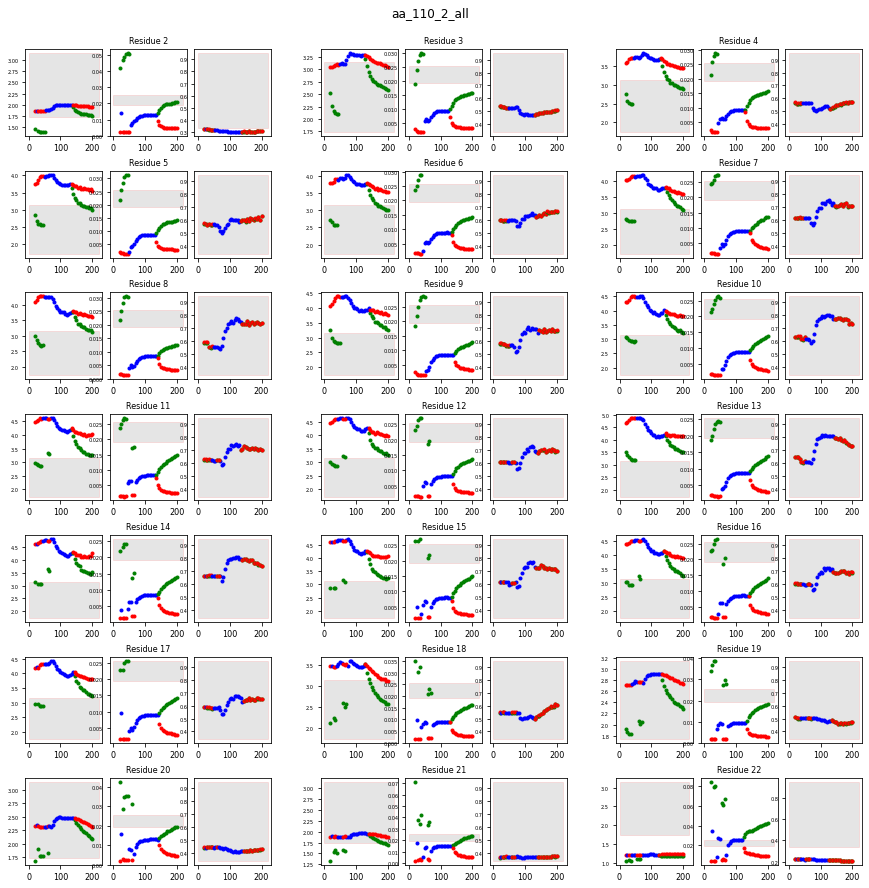

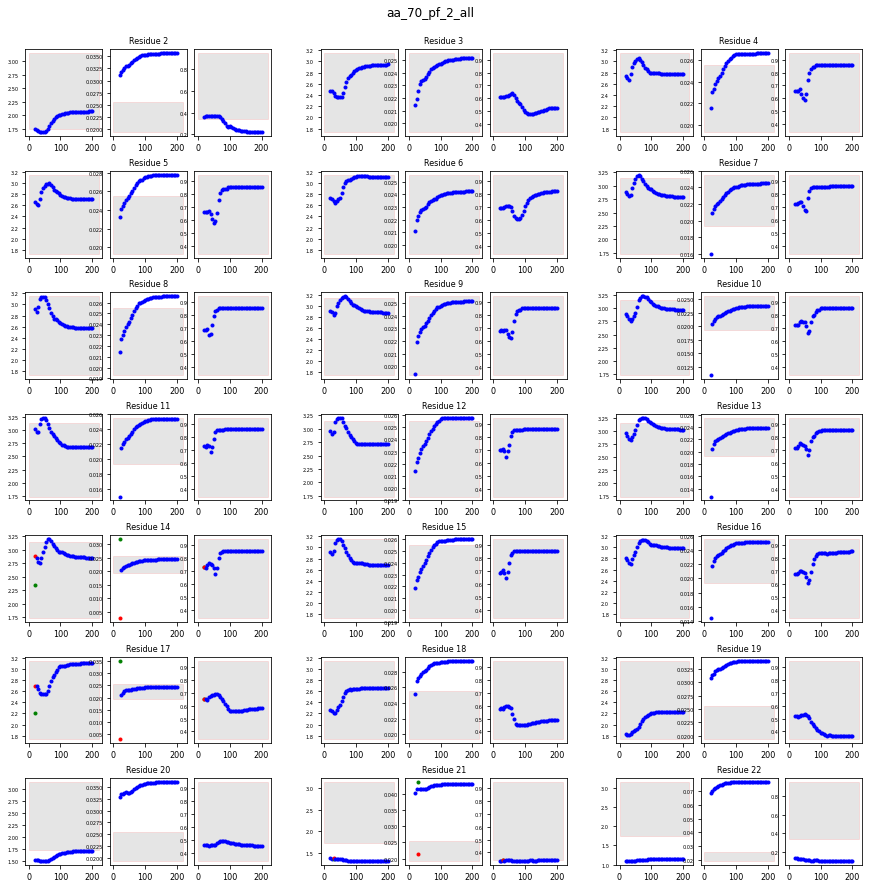

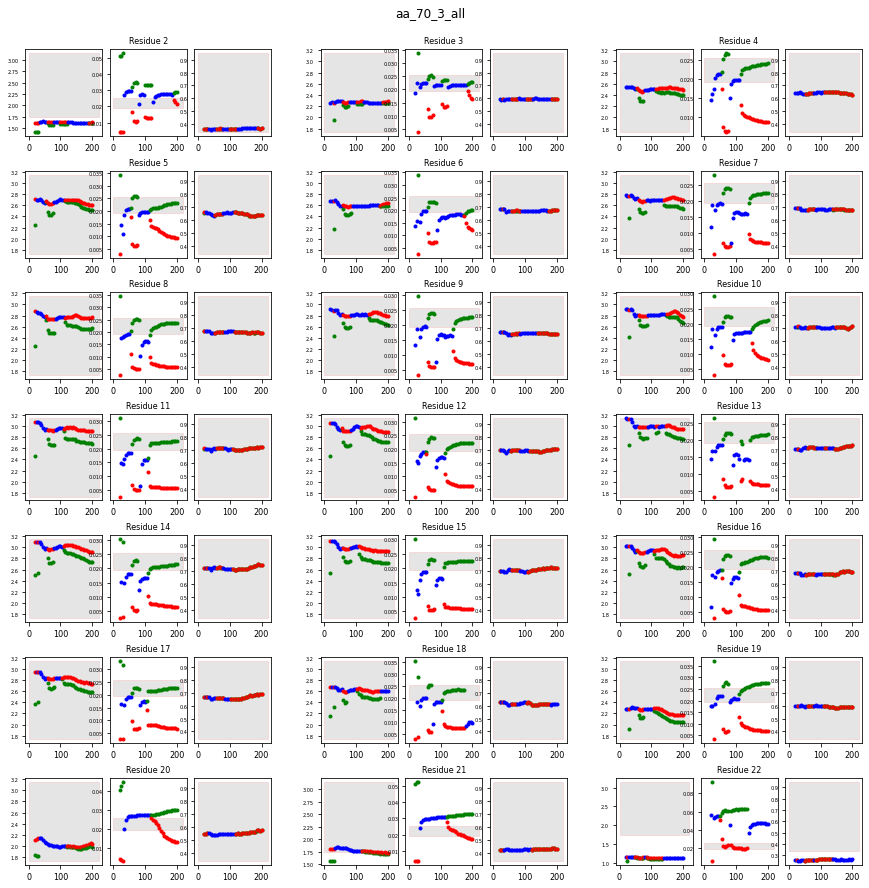

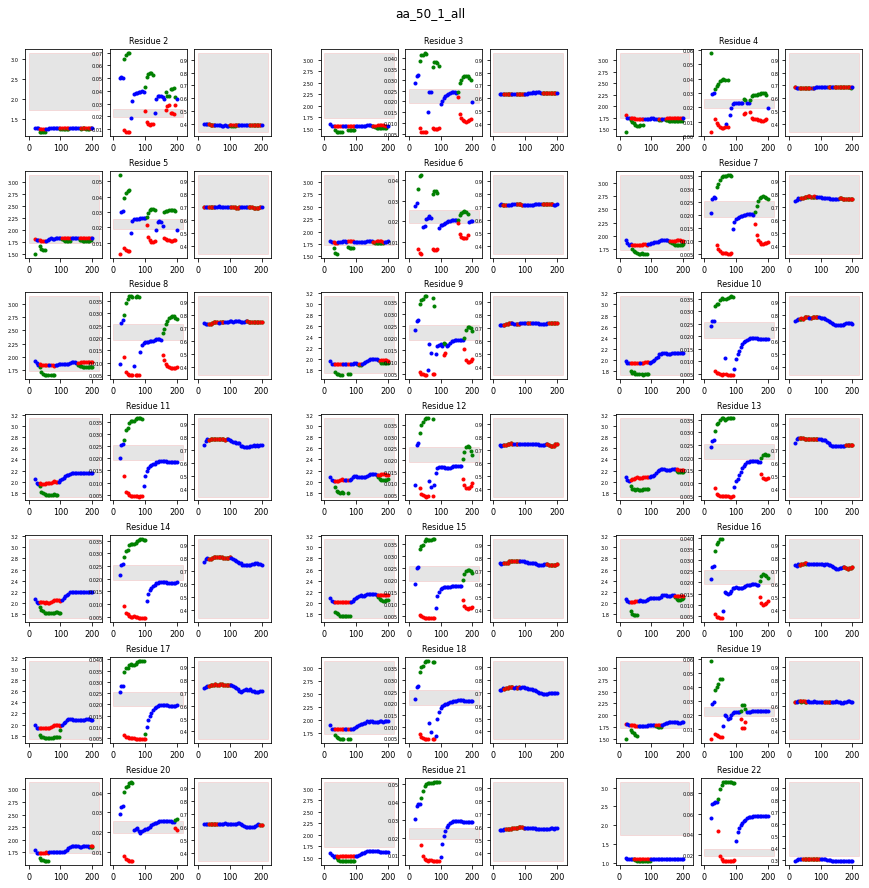

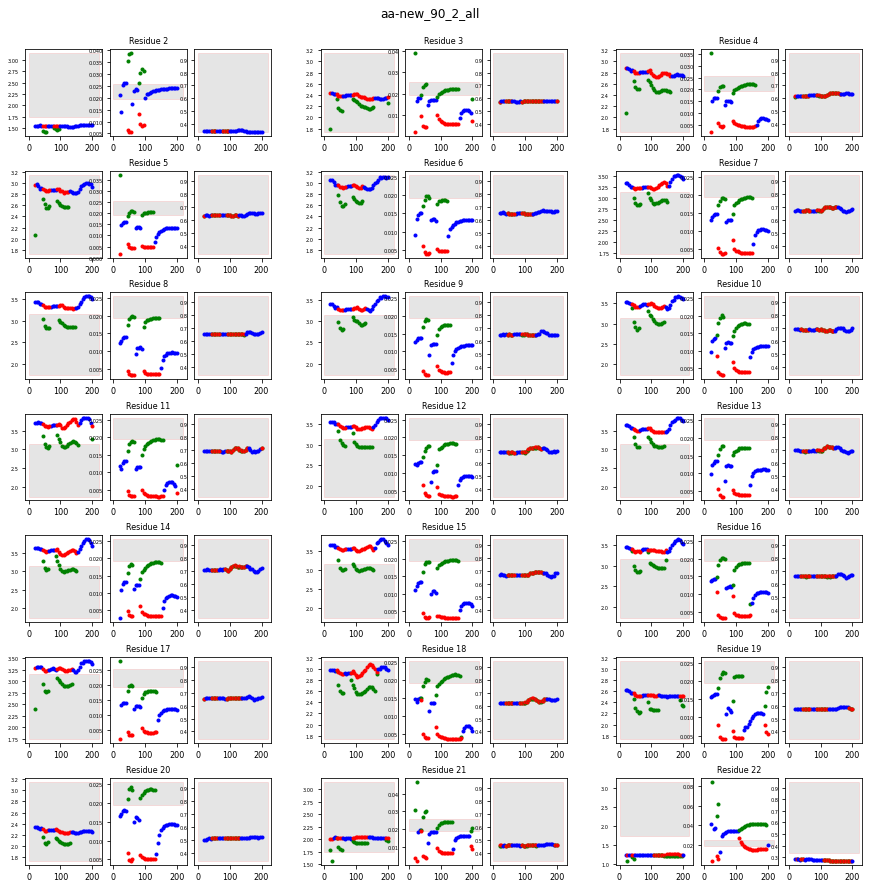

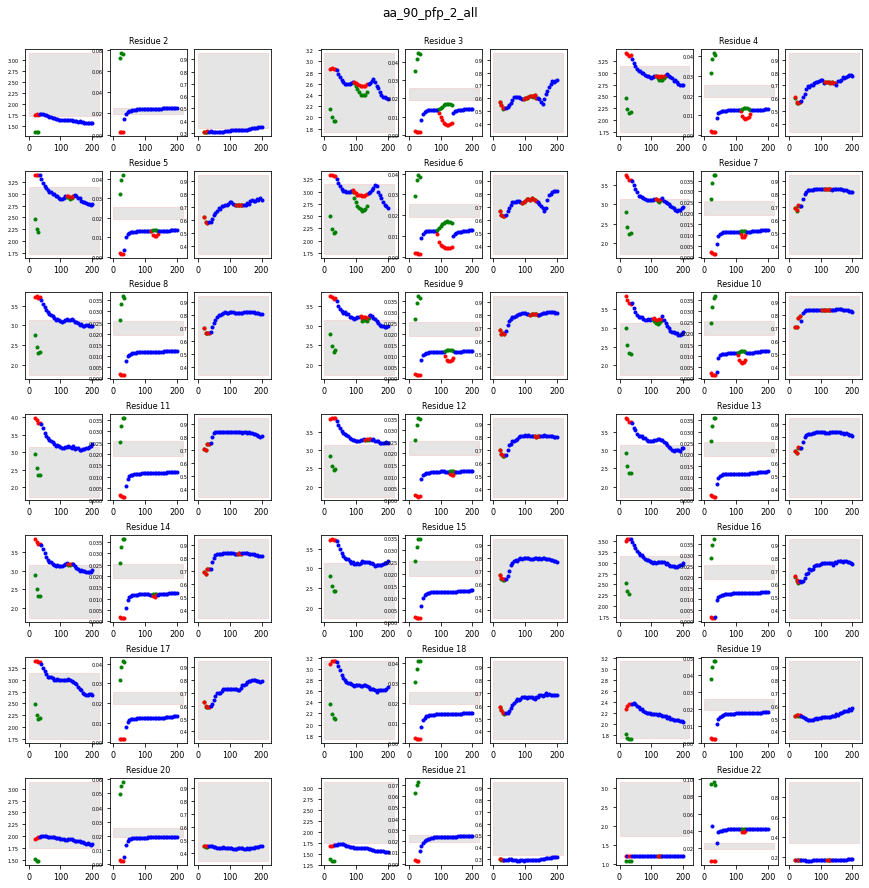

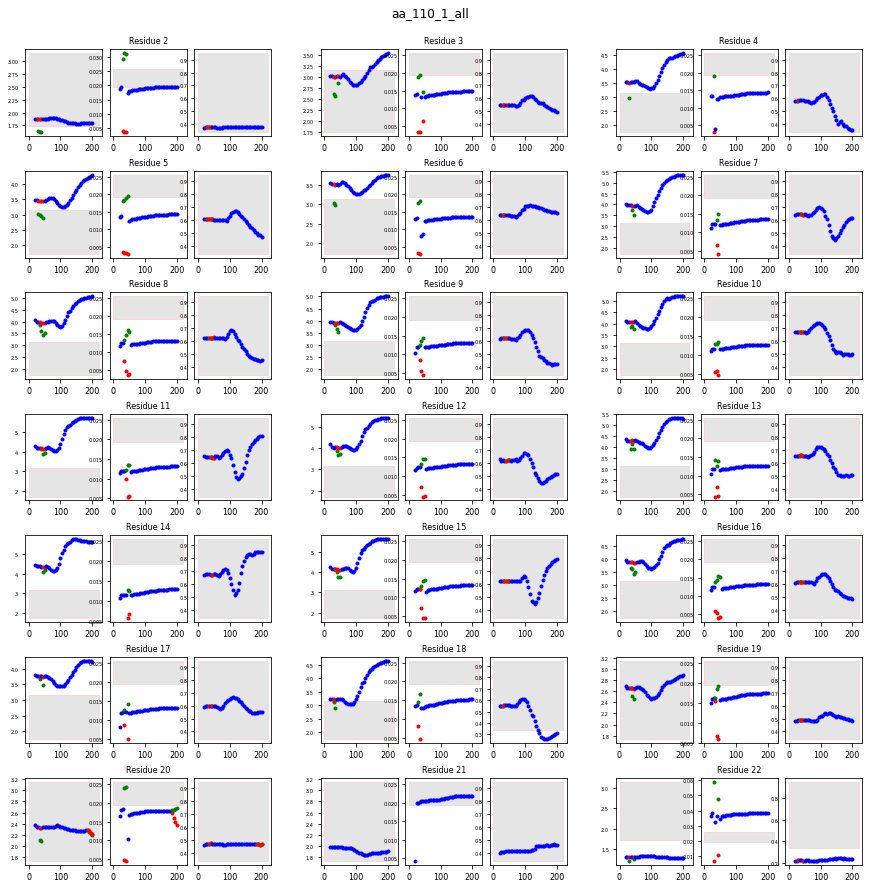

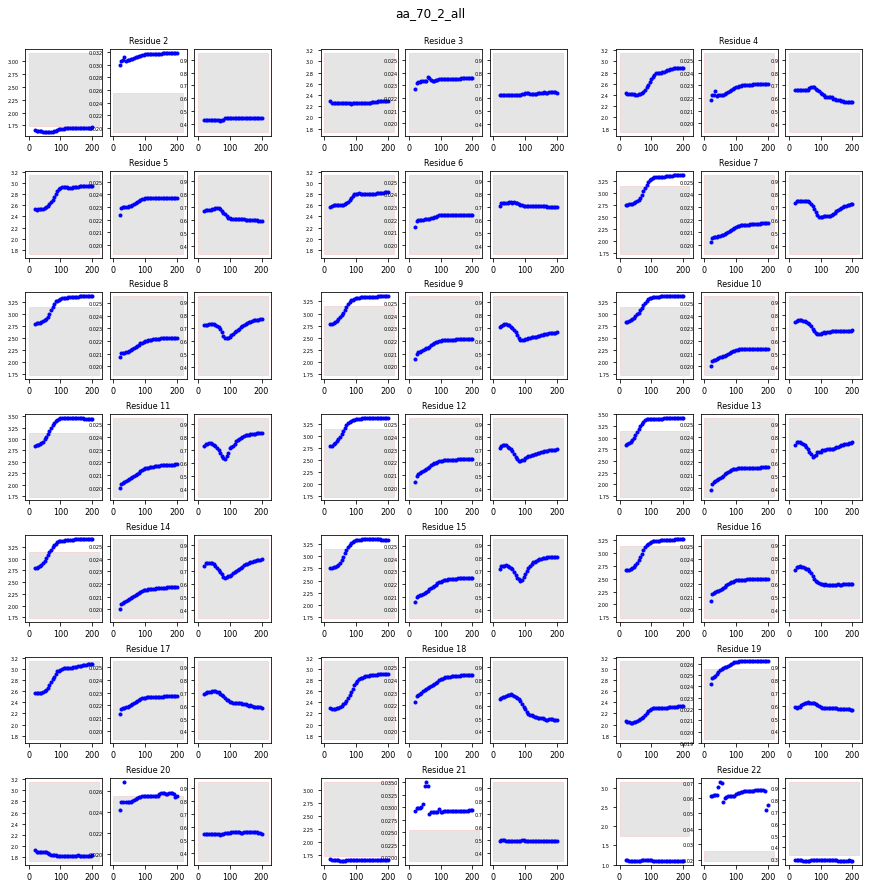

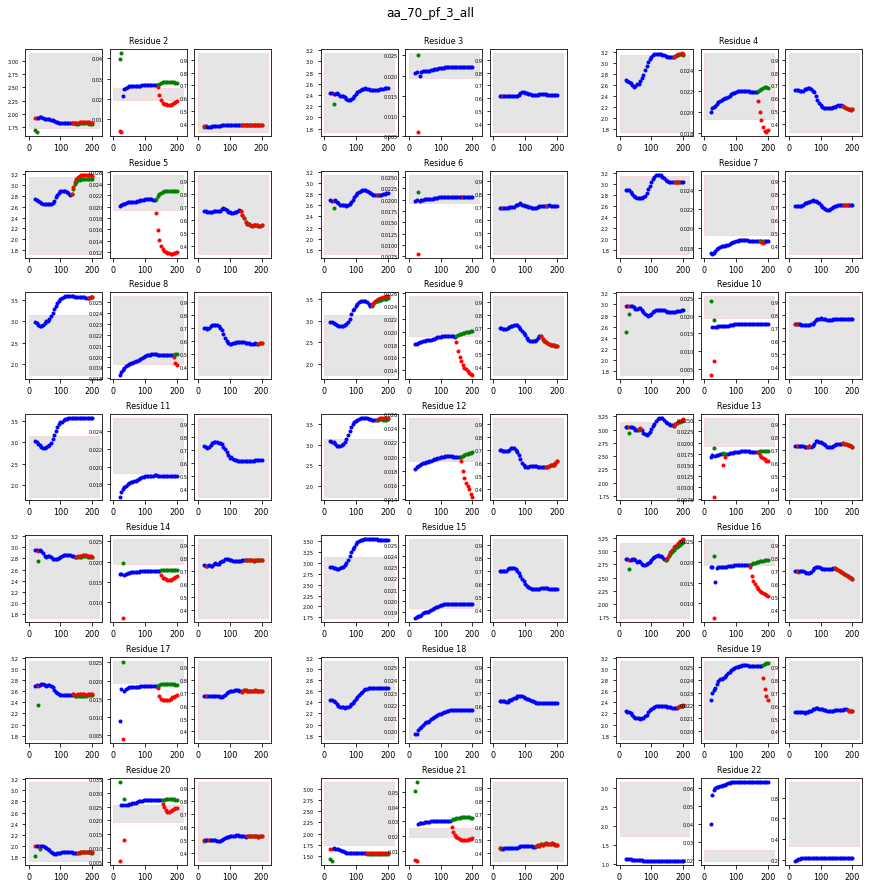

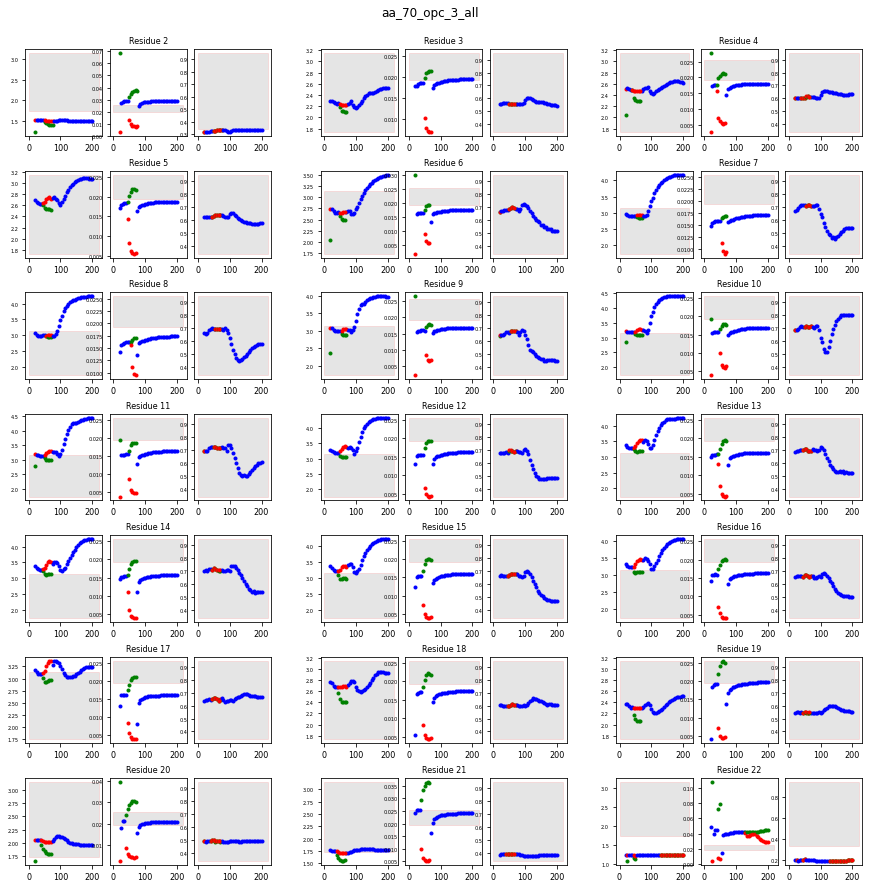

In [80]:
for system in timescales_yamls:
    plot_SRT_convergence_for_system(system)